In [11]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVR

from sklearn.metrics import explained_variance_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [12]:
# load data
data=pd.read_csv("C:/Users/admin/ML_Project/melb_data.csv")
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [14]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [15]:
# check null values
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [16]:
#fill null vlues by mean

data['Car'].fillna(data['Car'].mean(),inplace=True)

In [17]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [18]:
# check unique values
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [19]:
data['BuildingArea'].fillna(data['BuildingArea'].mean(),inplace=True)

In [20]:
data['YearBuilt'].fillna(data['YearBuilt'].mode()[0],inplace=True)

In [21]:
data['CouncilArea'].fillna(data['CouncilArea'].mode()[0],inplace=True)

In [22]:
data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [23]:
data.nunique()

Suburb             314
Address          13378
Rooms                9
Type                 3
Price             2204
Method               5
SellerG            268
Date                58
Distance           202
Postcode           198
Bedroom2            12
Bathroom             9
Car                 12
Landsize          1448
BuildingArea       603
YearBuilt          144
CouncilArea         33
Lattitude         6503
Longtitude        7063
Regionname           8
Propertycount      311
dtype: int64

In [24]:
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',500)

In [25]:
# pandas get dummies
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [26]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1970.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1970.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [27]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [28]:
# Use on Suburb column
# use fit method

le.fit(data['Suburb'])

LabelEncoder()

In [29]:
# use fit_transferm

data['Suburb']=le.fit_transform(data['Suburb'])

In [30]:
# check string is converted into numeric value using label_Encoder
data['Suburb']

0          0
1          0
2          0
3          0
4          0
        ... 
13575    302
13576    305
13577    305
13578    305
13579    313
Name: Suburb, Length: 13580, dtype: int32

In [31]:
# drop address column
data.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1970.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,0,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,0,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,0,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1970.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,0,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [32]:
data.drop(columns='Address',inplace=True)

In [33]:
data.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1970.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,0,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,0,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,0,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1970.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,0,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [34]:
# apply labeling to all remaing columns

cols=["Type","Method","SellerG","CouncilArea","Regionname","Date"]

def encode(c):
    le.fit(data[c])
    data[c]=le.fit_transform(data[c])
    
for c in cols:    
    encode(c)

In [35]:
#check data
data.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,2,0,1480000.0,1,23,45,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1970.0,31,-37.7996,144.9984,2,4019.0
1,0,2,0,1035000.0,1,23,47,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.0,31,-37.8079,144.9934,2,4019.0
2,0,3,0,1465000.0,3,23,48,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.0,31,-37.8093,144.9944,2,4019.0
3,0,3,0,850000.0,0,23,48,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1970.0,31,-37.7969,144.9969,2,4019.0
4,0,4,0,1600000.0,4,155,49,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.0,31,-37.8072,144.9941,2,4019.0


In [36]:
# Split data in X and y(independent feature and dependent feature)
X=data.drop(columns='Price')

In [37]:
X.head()

,Suburb,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,2,0,1,23,45,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1970.0,31,-37.7996,144.9984,2,4019.0
1,0,2,0,1,23,47,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.0,31,-37.8079,144.9934,2,4019.0
2,0,3,0,3,23,48,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.0,31,-37.8093,144.9944,2,4019.0
3,0,3,0,0,23,48,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1970.0,31,-37.7969,144.9969,2,4019.0
4,0,4,0,4,155,49,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.0,31,-37.8072,144.9941,2,4019.0


In [38]:
X.shape

(13580, 19)

In [39]:
y=data['Price'].copy()

In [40]:
y.shape

(13580,)

# Performing Train Test Spliting

    X- 2parts y-2parts
    
    xtrain,xtest,ytrain,ytest

In [41]:
xtrain,xtest=X[0:10000],X[10000:]
ytrain,ytest=y[0:10000],y[10000:]  
  

In [42]:
xtrain.shape

(10000, 19)

In [43]:
ytrain.shape

(10000,)

In [44]:
xtest.shape

(3580, 19)

In [45]:
ytest.shape

(3580,)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
from sklearn.metrics import explained_variance_score

In [48]:
mlr_model=LinearRegression()

In [49]:
#Apply - model linear Regression Model

mlr_model.fit(xtrain,ytrain)
mlr_score = mlr_model.score(xtest,ytest)
pred_mlr = mlr_model.predict(xtest)
expl_mlr = explained_variance_score(pred_mlr,ytest)

In [50]:
mlr_model.intercept_

-238003407.70318934

In [51]:
mlr_model.coef_

array([-3.98701289e+02,  1.52179993e+05, -2.22228009e+05, -4.06505762e+03,
       -2.06677885e+02, -3.19494391e+02, -5.76522825e+04,  1.08417663e+03,
        2.78798357e+04,  2.08519482e+05,  6.28826430e+04,  1.39916479e+01,
        4.69305539e+02, -2.24961040e+03, -4.33545730e+03, -1.03125383e+06,
        1.38529213e+06,  3.39957841e+04, -1.32259375e+00])

In [52]:
    # let predict xtest
    pred=mlr_model.predict(xtest)   

In [53]:
len(pred)
xtest.head()

,Suburb,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
10000,223,3,0,1,87,29,15.5,3167.0,3.0,1.0,1.0,743.0,151.96765,1970.0,20,-37.91282,145.10376,4,3692.0
10001,223,4,0,1,32,29,15.5,3167.0,4.0,2.0,2.0,624.0,151.96765,1970.0,20,-37.91489,145.08441,4,3692.0
10002,225,2,0,1,82,29,11.4,3204.0,2.0,1.0,2.0,253.0,151.96765,1970.0,8,-37.90173,145.04466,5,3578.0
10003,226,4,0,1,35,29,47.3,3810.0,4.0,2.0,2.0,425.0,151.96765,1970.0,4,-38.07474,145.45376,1,17384.0
10004,227,4,0,3,32,29,21.5,3195.0,4.0,2.0,2.0,597.0,150.00000,1970.0,12,-37.99232,145.08469,4,5087.0


In [54]:
pred

array([1031140.10907409, 1467633.63303432, 1176696.57377392, ...,
       1334773.59540486, 1563382.42031515, 1229690.86605996])

In [55]:
pred_df=pd.DataFrame(pred)

In [56]:
pred_df.head()

,0
0,1.031140e+06
1,1.467634e+06
2,1.176697e+06
3,9.525907e+05
4,1.254127e+06


In [57]:
ytest.head()

10000    1265000.0
10001    1050000.0
10002     790000.0
10003     410500.0
10004    1300000.0
Name: Price, dtype: float64

In [58]:
# get error
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae=mean_absolute_error(ytest,pred_df)
print("Error : ",mae)

mse=mean_squared_error(ytest,pred_df)
print("Error : ",mse)

Error :  299814.64708783105
Error :  303757903601.7943


In [59]:
# IQR values(Inter quartile Range example)

from scipy import stats
values = pred_df
s = stats.iqr(values)
print(s)


734804.7363338768


In [60]:
#Apply SVM Model
def RMSE(ytrain, pred):
    return mean_squared_error(ytrain, pred,squared = False)

In [61]:
def fit_and_evaluate (model):
    model.fit(xtrain, ytrain.ravel())
    model_pred = model.predict(xtest)
    model_RMSE = RMSE(ytest, model_pred)    
    return model_RMSE


In [62]:
svr = SVR(C=1000, gamma = 0.1)
svr_RMSE = fit_and_evaluate(svr)
svr_RMSE

623261.145828377

In [63]:
SVM = SVR().fit(xtrain, ytrain.ravel())
svm_score = SVM.score(xtrain, ytrain)
expl_svm = explained_variance_score(pred,ytest)
print('R_squared:', svm_score)
print('RMSE:', svr_RMSE)

R_squared: -0.07105854350586083
RMSE: 623261.145828377


In [64]:
#Random Forest Regression Model

random_forest = RandomForestRegressor(random_state=60)
random_forest_RMSE = fit_and_evaluate(random_forest)
#random_forest_RMSE
rf_score=random_forest.score(xtest,ytest)
expl_rf=explained_variance_score(pred,ytest)

In [65]:
#Apply  Decision Tree model
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(xtrain,ytrain)
tr_regressor.score(xtest,ytest)
pred_tr = tr_regressor.predict(xtest)
decision_score=tr_regressor.score(xtest,ytest)
expl_tr = explained_variance_score(pred_tr,ytest)

# Compariosion of models
print("Linear Regression Model Score is ",round(mlr_model.score(xtest,ytest)*100))
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(xtest,ytest)*100))
print("Random Forest Regression Model Score is ",round(random_forest.score(xtest,ytest)*100))
print("Support Vector machine Model Score is ",round(SVM.score(xtest,ytest)*100))

Linear Regression Model Score is  17
Decision tree  Regression Model Score is  27
Random Forest Regression Model Score is  75
Support Vector machine Model Score is  -6


In [66]:
#Let's have a tabular pandas data frame, for a clear comparison

models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression','Support Vector Machine'],
                            'Score':[mlr_score,decision_score,rf_score,svm_score],
                            'Explained Variance Score':[expl_mlr,expl_tr,expl_rf,expl_svm]
                           })
models_score.sort_values(by='Score',ascending=False)

,Model,Score,Explained Variance Score
2,Random forest Regression,0.753516,0.298885
1,Decision Tree,0.268222,0.433717
0,Multiple Linear Regression,0.173368,0.298885
3,Support Vector Machine,-0.071059,0.298885


Conclusion---

From the above it is clear that random forest accuracy is 75% and also expalined variance score is 0.29 . 

So Random Forest is a suitable model for predicting the price of the house.

Though there remains other regression model which can bring out the best of the dataset.

# Exploratory Data Analysis - Visualizations

### *** 1) HEATMAP FOR CORRELATION ANALYSIS ***

In [59]:
data.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount'],
      dtype='object')

In [60]:
data.shape

(13580, 20)

In [132]:
data.isna().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [135]:
#nullvalues=data.isnull().sum()
#nullvalues=nullvalues[nullvalues>0]
#nullvalues.sort_values(inplace=True)
#plt.figure(figsize=(10,8))
#print(nullvalues)


C:\Users\admin\AppData\Local\Temp\ipykernel_5500\3833707358.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'],kde=False,bins=20);


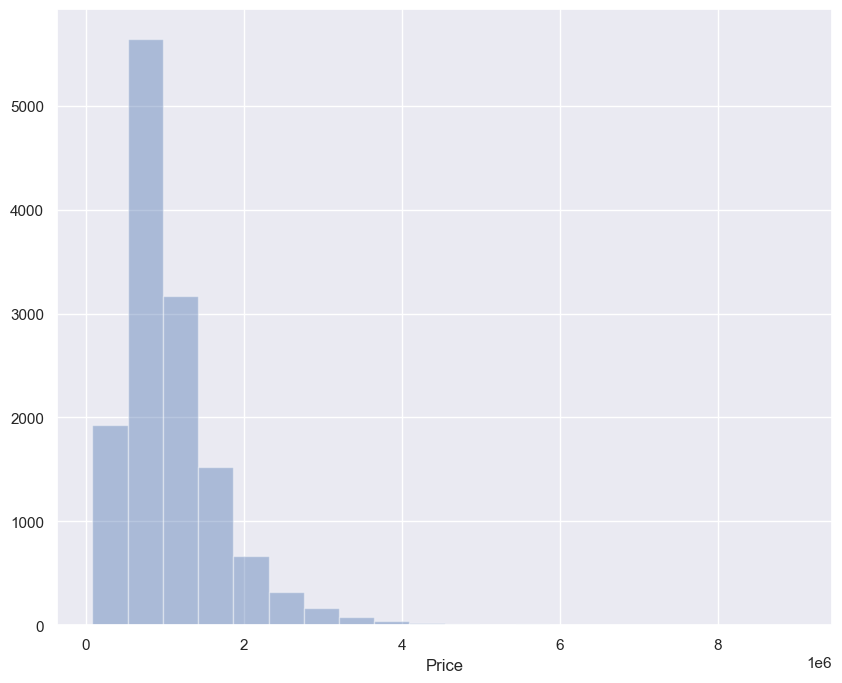

In [62]:
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(data['Price'],kde=False,bins=20);

<AxesSubplot: xlabel='Price', ylabel='Density'>

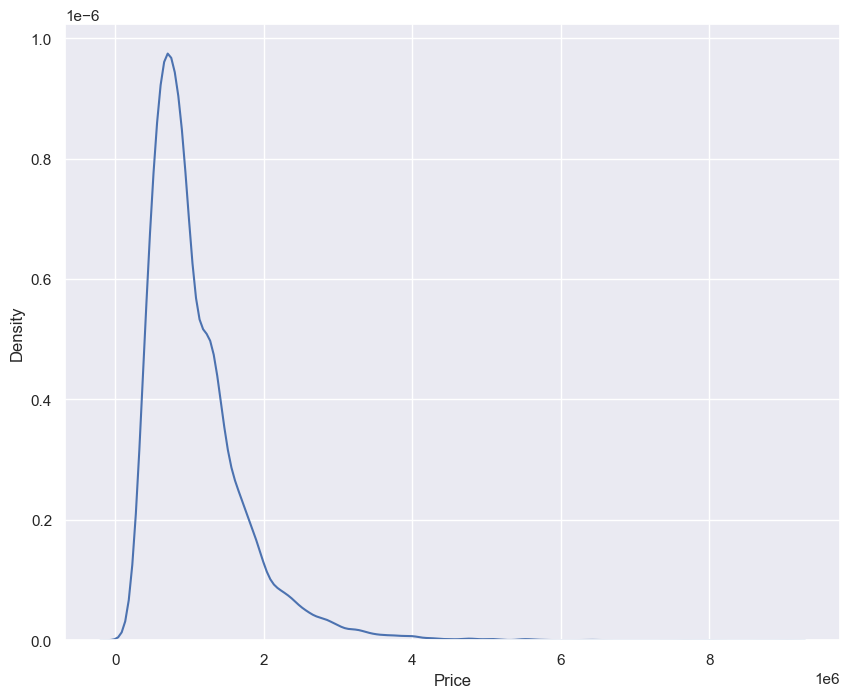

In [63]:
sns.kdeplot(data['Price'])

In [64]:
data['Price'].describe()

count    1.358000e+04
mean     1.075684e+06
std      6.393107e+05
min      8.500000e+04
25%      6.500000e+05
50%      9.030000e+05
75%      1.330000e+06
max      9.000000e+06
Name: Price, dtype: float64

## Correlation

In [65]:
numeric_features=data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount'],
      dtype='object')

In [66]:
categorical_features=data.select_dtypes(include=[np.object])
categorical_features.columns

C:\Users\admin\AppData\Local\Temp\ipykernel_5500\3131967267.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features=data.select_dtypes(include=[np.object])


Index([], dtype='object')

In [67]:
correlation=numeric_features.corr()
print(correlation['Price'].sort_values(ascending=False),'\n')

Price            1.000000
Rooms            0.496634
Bedroom2         0.475951
Bathroom         0.467038
Car              0.238637
Longtitude       0.203656
Postcode         0.107867
Regionname       0.079109
BuildingArea     0.069570
Landsize         0.037507
Date            -0.021088
Method          -0.037741
Propertycount   -0.042153
SellerG         -0.052109
CouncilArea     -0.088865
Suburb          -0.135830
Distance        -0.162522
Lattitude       -0.212934
YearBuilt       -0.259387
Type            -0.414566
Name: Price, dtype: float64 



<AxesSubplot: title={'center': 'Correlation of Numeric Features with Price'}>

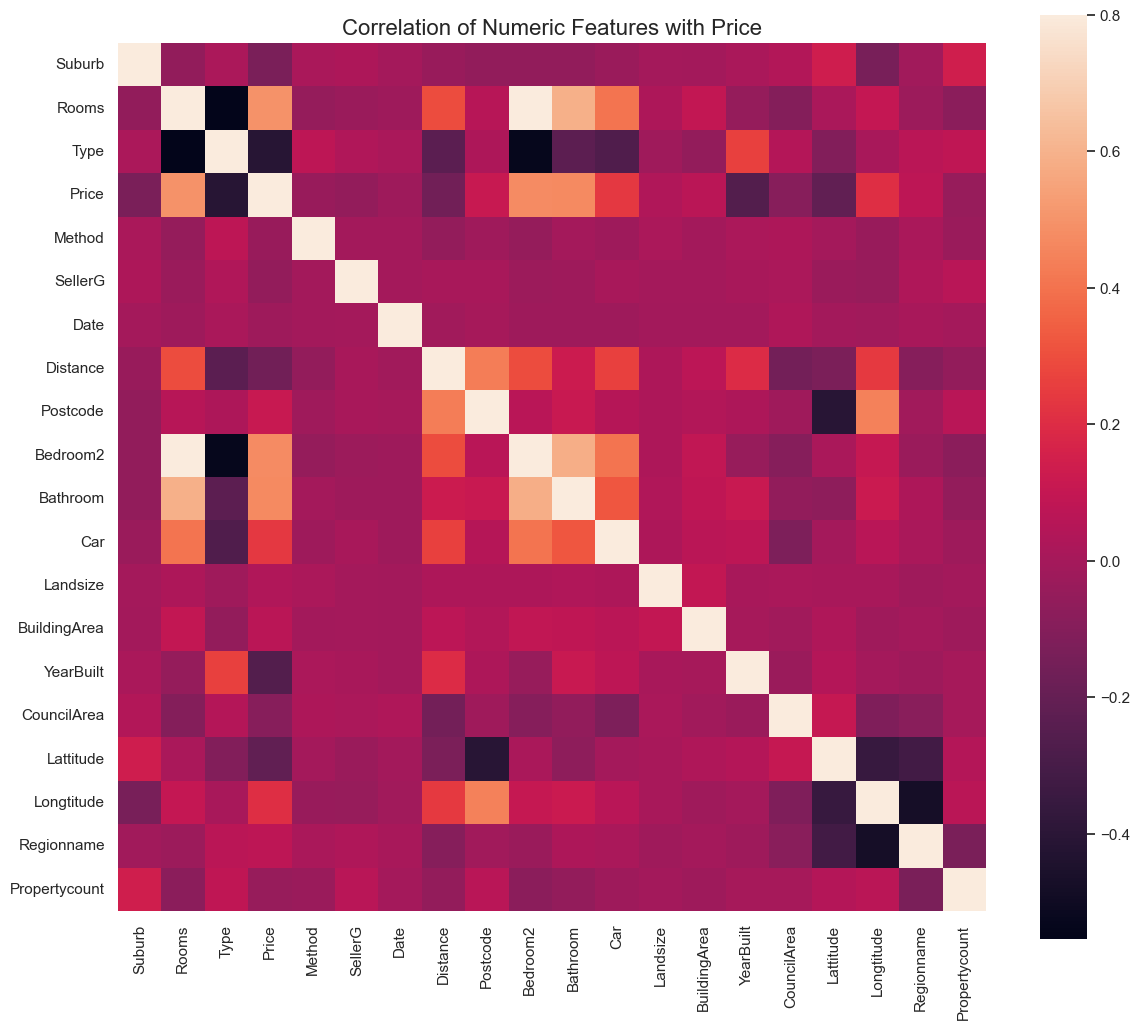

In [68]:
f,ax=plt.subplots(figsize=(14,12))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.heatmap(correlation,square=True,vmax=0.8)

Index(['Price', 'Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Longtitude',
       'Postcode', 'Regionname', 'BuildingArea', 'Landsize', 'Date'],
      dtype='object')


<AxesSubplot: >

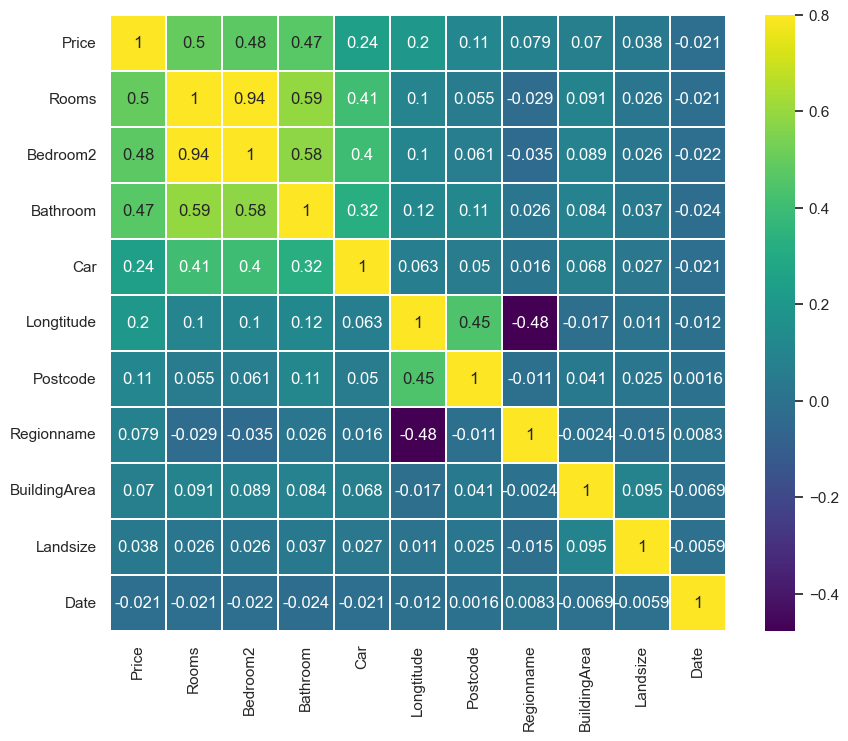

In [69]:
k=11
cols=correlation.nlargest(k,'Price')['Price'].index
print(cols)
cm=np.corrcoef(data[cols].values.T)
f,ax=plt.subplots(figsize=(10,8))
sns.heatmap(cm,vmax=.8,linewidths=0.01,square=True,annot=True,cmap='viridis',
           linecolor="white",xticklabels=cols.values,annot_kws={'size':12},yticklabels=cols.values)

## ScatterPlot

<AxesSubplot: xlabel='Rooms', ylabel='Price'>

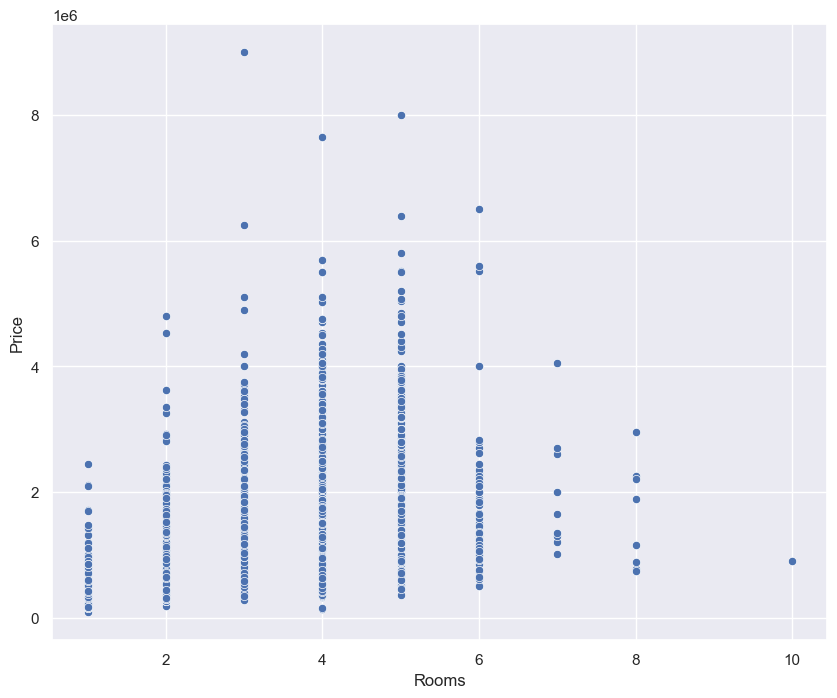

In [70]:
sns.scatterplot(x='Rooms',y='Price',data=data)

<AxesSubplot: xlabel='Rooms', ylabel='Bedroom2'>

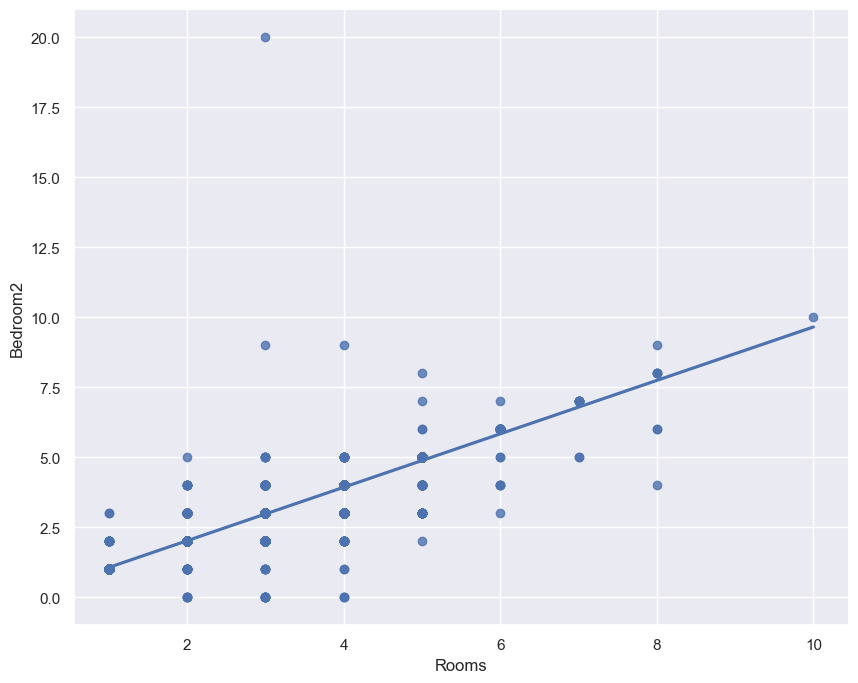

In [90]:
sns.regplot(x='Rooms',y='Bedroom2',data=data,scatter=True,fit_reg=True)

<AxesSubplot: xlabel='Regionname', ylabel='Price'>

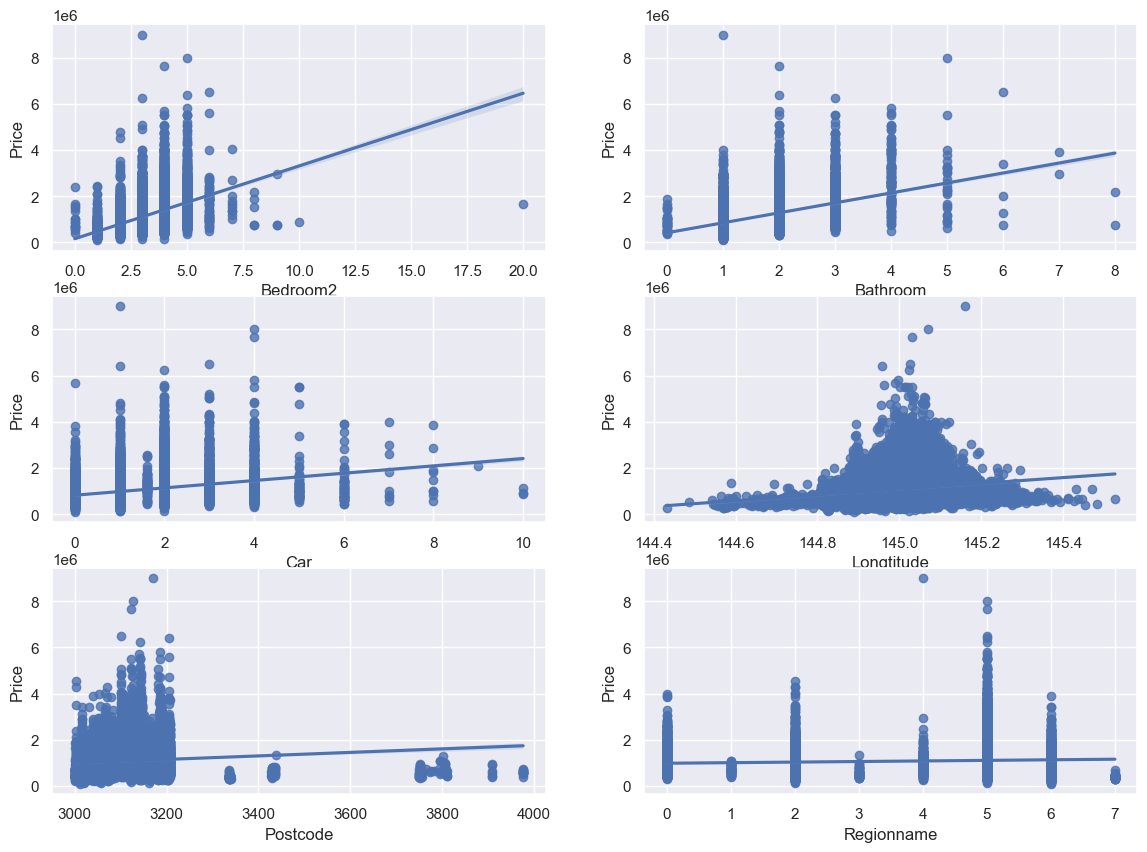

In [116]:
# scatter plot between most correlation variables

fig,((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(nrows=3,ncols=2,figsize=(14,10))

sns.regplot(x='Bedroom2',y='Price',data=data,scatter=True,fit_reg=True,ax=ax1)

sns.regplot(x='Bathroom',y='Price',data=data,scatter=True,fit_reg=True,ax=ax2)

sns.regplot(x='Car',y='Price',data=data,scatter=True,fit_reg=True,ax=ax3)

sns.regplot(x='Longtitude',y='Price',data=data,scatter=True,fit_reg=True,ax=ax4)

sns.regplot(x='Postcode',y='Price',data=data,scatter=True,fit_reg=True,ax=ax5)

sns.regplot(x='Regionname',y='Price',data=data,scatter=True,fit_reg=True,ax=ax6)


<AxesSubplot: xlabel='Price'>

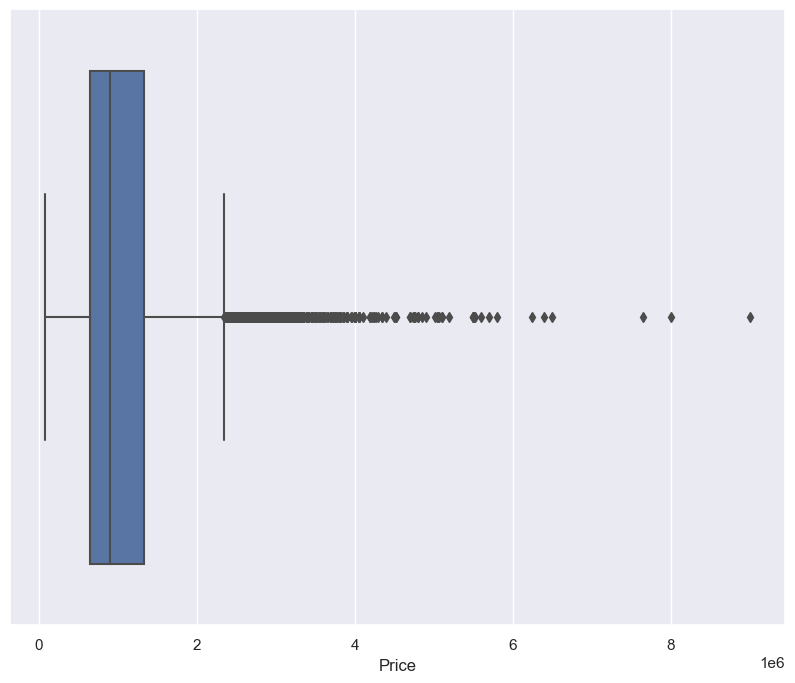

In [88]:
sns.boxplot(x=data['Price'])


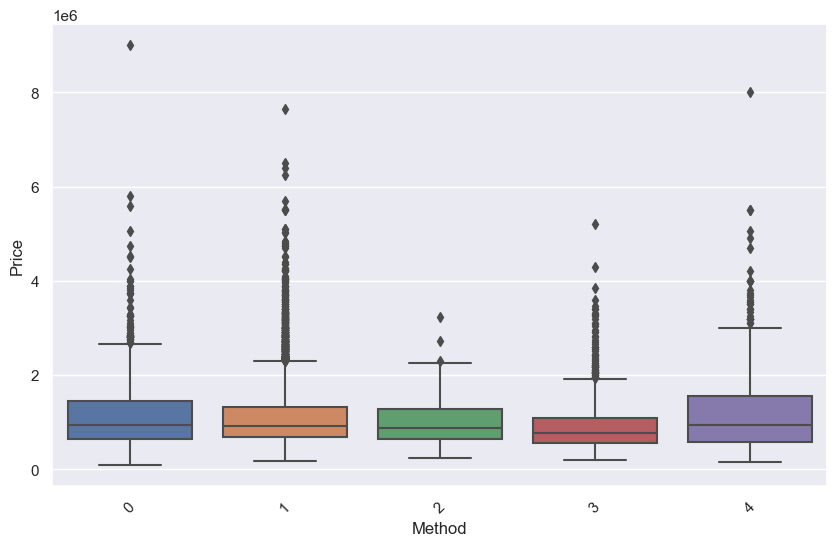

In [108]:
f, ax=plt.subplots(figsize=(10,6))
fig=sns.boxplot(x='Method',y='Price',data=data)
#fig.axis(ymin=0,ymax=800000);
xt=plt.xticks(rotation=45)


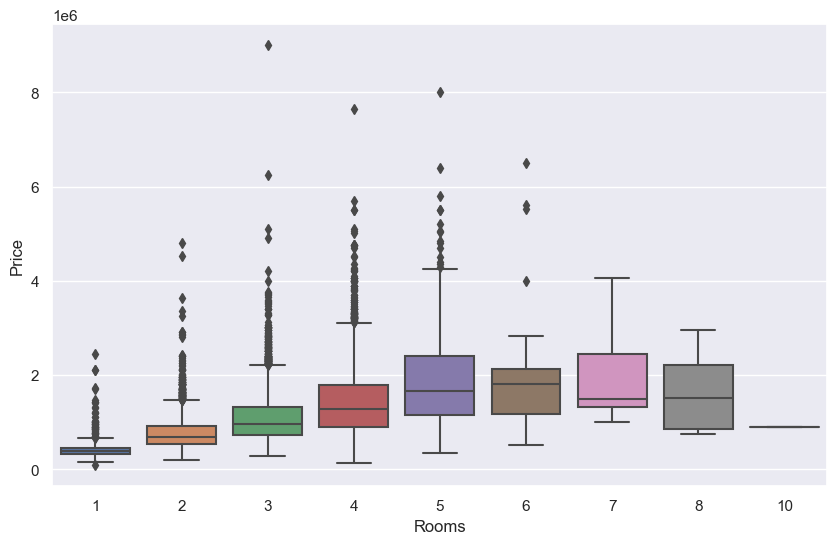

In [134]:
f, ax=plt.subplots(figsize=(10,6))
fig=sns.boxplot(x='Rooms',y='Price',data=data)
#fig.axis(ymin=0,ymax=800000);

# Remove bad features from data

In [ ]:
#Multicolinear features:
    Rooms<-->Bedroom2
#Features with poor correlation with target feature(Price):
Date            -0.021088
Method          -0.037741
Propertycount   -0.042153
SellerG         -0.052109
CouncilArea     -0.088865
Suburb          -0.135830
Distance        -0.162522
Lattitude       -0.212934
YearBuilt       -0.259387
Type            -0.414566


In [112]:
cols_to_remove=['Date','Method','Propertycount','SellerG','CouncilArea','Suburb','Distance','Lattitude','YearBuilt','Type']

In [114]:
# drop the columns
data.drop(cols_to_remove,axis=1)

,Rooms,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Longtitude,Regionname
0,2,1480000.0,3067.0,2.0,1.0,1.0,202.0,151.96765,144.99840,2
1,2,1035000.0,3067.0,2.0,1.0,0.0,156.0,79.00000,144.99340,2
2,3,1465000.0,3067.0,3.0,2.0,0.0,134.0,150.00000,144.99440,2
3,3,850000.0,3067.0,3.0,2.0,1.0,94.0,151.96765,144.99690,2
4,4,1600000.0,3067.0,3.0,1.0,2.0,120.0,142.00000,144.99410,2
...,...,...,...,...,...,...,...,...,...,...
13575,4,1245000.0,3150.0,4.0,2.0,2.0,652.0,151.96765,145.16761,4
13576,3,1031000.0,3016.0,3.0,2.0,2.0,333.0,133.00000,144.87904,6
13577,3,1170000.0,3016.0,3.0,2.0,4.0,436.0,151.96765,144.88738,6
13578,4,2500000.0,3016.0,4.0,1.0,5.0,866.0,157.00000,144.89299,6
